In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



DOWNLOAD_PATH = "https://raw.githubusercontent.com/JesusNoelValMo/Machine_Learning_Book/master/Chapter_4_Training_Models/Exercises/high_diamond_ranked_10min.csv"

In [2]:
def load_csv(path):
  return pd.read_csv(path)

In [3]:
data_ = load_csv(DOWNLOAD_PATH)
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [4]:
from sklearn.model_selection import  StratifiedShuffleSplit
from sklearn.model_selection import  train_test_split
corr_matrix = data_.corr()
#print(corr_matrix["blueWins"].sort_values(ascending=False))
#Separate labels and features
y_bluewins = data_["blueWins"]
X_features = data_[["blueTotalGold", "blueAvgLevel", "blueKills", "blueAssists", "blueTotalMinionsKilled", "blueDragons", "blueTotalJungleMinionsKilled"]] #Let's take only some attributes
#Split to have train and test data
X_features_train, X_features_test, y_bluewins_train, y_bluewins_test = train_test_split(X_features, y_bluewins, test_size=0.2)




In [5]:
#Let's Scale our data!
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_features_train_scaled = scaler.fit_transform(X_features_train)
X_features_test_scaled = scaler.fit_transform(X_features_test)
X_features_test_scaled.shape

(1976, 7)

#**BATCH GRADIENT DESCENT**

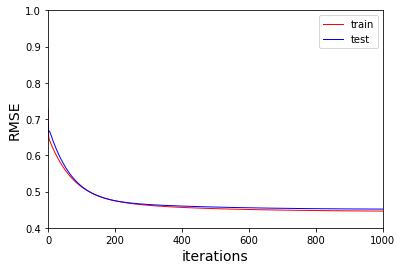

Thetas using Batch gradient descent: [[-0.80895541]
 [ 0.9525387 ]
 [ 0.5258611 ]
 [ 0.26291651]
 [ 0.03863114]
 [ 0.40499594]
 [ 0.12987832]
 [ 0.21329816]]
Thetas using Normal Equation: [[-0.79385663]
 [ 1.11892614]
 [ 0.5356694 ]
 [ 0.12285929]
 [ 0.0332286 ]
 [ 0.34719832]
 [ 0.13120763]
 [ 0.17949636]]


In [53]:
#First, add a bias parameter X0 = 1
from sklearn.metrics import mean_squared_error

X_features_w_bias = np.c_[np.ones((7903,1)), X_features_train_scaled]
X_features_w_bias_test = np.c_[np.ones((1976,1)), X_features_test_scaled]

eta = 0.1 #Learning Rate
n_iterations = 10000
m = 7903
epsilon =  0.454  #Tolerance 

theta = np.random.randn(8,1)
y_for_iters = y_bluewins_train.to_numpy().reshape(m,1)
iterations = 0
train_errors, test_errors = [], []

for iteration in range(n_iterations):
  gradients = 2/m * X_features_w_bias.T.dot(X_features_w_bias.dot(theta) - y_for_iters)
  theta = theta - eta * gradients
  iteration += 1

  #Plot predictions 
  train_predictions = X_features_w_bias.dot(theta)
  test_predictions = X_features_w_bias_test.dot(theta)

  train_errors.append(mean_squared_error(y_bluewins_train, train_predictions))
  test_errors.append(mean_squared_error(y_bluewins_test, test_predictions))
  if mean_squared_error(y_bluewins_train, train_predictions) > epsilon:
    pass

plt.plot(np.sqrt(train_errors), "r-", linewidth=1, label="train")
plt.plot(np.sqrt(test_errors), "b-", linewidth=1, label="test")
plt.legend(loc="upper right")
plt.xlabel("iterations", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.axis([0,1000,0.4,1.0])
plt.show()

print(f'Thetas using Batch gradient descent: {theta}')
#For compare purpose, let's compute thetas by the normal equation
theta_norm_eq = np.linalg.inv(X_features_w_bias.T.dot(X_features_w_bias)).dot(X_features_w_bias.T).dot(y_for_iters)
print(f'Thetas using Normal Equation: {theta_norm_eq}')


In [7]:
#Let's apply confussion matrix to analyze
from sklearn.metrics import confusion_matrix
one_zero_train_redictions = (train_predictions>1)
confusion_matrix(one_zero_train_redictions, y_bluewins_train)

array([[3934, 3815],
       [   7,  147]])

# **Stochastic Gradient Descent**

In [89]:
#Let's Try a SGD implementation
t0, t1 = 5,5 
n_epochs = 10
theta = np.random.randn(8,1)
errors_stoch = []
print(theta)
def learning_schedule (t):
  return t0 / ( t + t1)

for epoch in range(n_epochs):
  for i in range(m):

    random_idx = np.random.randint(m)
    x_random = X_features_w_bias[random_idx:random_idx + 1]
    y_random = y_for_iters[random_idx:random_idx+1]
    gradients = 2 * x_random.T.dot(x_random.dot(theta) - y_random)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients
    predictions_stoch_train = X_features_w_bias.dot(thetas) 
    errors_stoch.append(np.sqrt(mean_squared_error(y_bluewins_train, predictions_mini_train)))

errors_mini


[[-0.57062647]
 [ 0.12811305]
 [-0.01693389]
 [-0.65546877]
 [-0.23523929]
 [-0.8450075 ]
 [ 0.60441279]
 [ 1.28358266]]


[1.2874209226210314,
 0.5457141279721586,
 0.5233522615858683,
 0.5173770724160367,
 0.5156371926016071,
 0.514747844811154,
 0.5140210045029081,
 0.5134000027140252,
 0.5128773685514361,
 0.5124627110197902,
 0.5120680952030677,
 0.5117651001529607,
 0.5114370228168256,
 0.5111596323456203,
 0.5108349790055107,
 0.5106100394394096,
 0.5103341558446786,
 0.510123523677693,
 0.5099332894899229,
 0.5097695134289503]

# **Mini-batch Gradient Descent**

In [97]:
t0, t1 = 5,50 
n_epochs = 20
thetas = np.random.randn(8,1)
n_indexes = 2000
errors_mini = []
def learning_schedule (t):
  return t0 / ( t + t1)
for epoch in range(n_epochs):
  random_indexes = np.random.choice(m, n_indexes)
  
  x_random = X_features_w_bias[random_indexes]
  y_random = y_for_iters[random_indexes]
  gradients = 2 * x_random.T.dot(x_random.dot(thetas) - y_random)
  eta = learning_schedule(epoch * m + i)
  thetas = thetas - eta * gradients
  predictions_mini_train = X_features_w_bias.dot(thetas) 
  errors_mini.append(np.sqrt(mean_squared_error(y_bluewins_train, predictions_mini_train)))

errors_mini

[15.671551319773544,
 38.26127262180072,
 49.014798655335056,
 35.81052924803976,
 13.695968962672278,
 2.174956071094851,
 0.49870644806331577,
 0.49429558655562483,
 0.49271220224135776,
 0.491988121312558,
 0.49092408486782885,
 0.4901608297276068,
 0.48947853991808854,
 0.4889314987867484,
 0.48847128361412184,
 0.48805680771266974,
 0.48763639006705517,
 0.48726541010739155,
 0.48691486465500156,
 0.48662975360960486]